<a href="https://colab.research.google.com/github/crzysab/Projek-DQLab/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 50

Import Dataset

In [2]:
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

In [8]:
#Tampilkan jumlah baris dan kolom
df.shape

(7113, 22)

Menampilkan Data

In [5]:
df.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
#Jumlah ID yang unik
df.customerID.nunique()

7017

Filter ID Number Pelanggan

In [11]:
#membuat kolom bantuan
df['valid_id'] = df['customerID'].astype(str).str.match(r'(45\d{9,10})')
#2 digit pertama adalah angka 45 diikuti 9-10 angka dibelakangnya

#menghapus kolom bantuan
df = (df[df['valid_id'] == True]).drop('valid_id', axis=1)

In [12]:
print('Hasil jumlah ID Customer yang terfilter adalah', df['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006


filter Duplikasi ID Number Pelanggan

In [13]:
# Drop Duplicate Rows
df.drop_duplicates()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,202006,45117219093,Male,0,Yes,Yes,53.0,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Two year,No,Bank transfer (automatic),69.70,3686.05,NaN
7109,202006,45564915800,Female,0,No,No,12.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Mailed check,95.50,1115.15,NaN
7110,202006,45655964195,Male,0,No,No,26.0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.65,2537.00,NaN
7111,202006,45899251814,Male,0,No,No,21.0,Yes,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,61.65,1393.60,NaN


In [16]:
# Drop duplicate ID sorted by Periode
df = df.sort_values('UpdatedAt',ascending=False).drop_duplicates(['customerID'])
#diurutkan berdasarkan periode pada kolom UpdateAt secara decending kemudian dilakukan penghapusan duplikasi

In [15]:
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


Mengatasi Missing Values dengan Penghapusan Rows

In [17]:
#Penghapusan Missing Value pada kolom Churn
print('Total missing values data dari kolom Churn',df['Churn'].isnull().sum())

Total missing values data dari kolom Churn 43


In [18]:
# Mengapus missing value pada spesifik kolom (Churn)
df.dropna(subset=['Churn'], inplace=True)

In [19]:
print('Total missing values data dari kolom Churn setelah dihapus',df['Churn'].isnull().sum())

Total missing values data dari kolom Churn setelah dihapus 0


In [20]:
print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah', df.shape)

Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)


Missing Values dengan Pengisian Nilai tertentu

In [22]:
#Cek Status Missing Value
print('Status Missing Values:', df.isnull().values.any())

Status Missing Values: True


In [25]:
#Cek Missing Value di Masing-masing kolom
print('Jumlah Missing Values masing-masing kolom, adalah:')
df.isnull().sum().sort_values(ascending=False)

Jumlah Missing Values masing-masing kolom, adalah:


tenure              99
MonthlyCharges      26
TotalCharges        15
Churn                0
InternetService      0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
UpdatedAt            0
dtype: int64

In [26]:
#Mengatasi missing values pada kolom Tenure dengan 11
#pihak data modeller meminta setiap rows yang memiliki missing values untuk Lama berlangganan di isi dengan 11
df['tenure'].fillna(11 , inplace=True)

In [27]:
#Mengatasi missing values Variable angka (kecuali Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
  #menggunakan median
	median = df[col_name].median() #mendapatkan nilai median untuk setiap kolom
	df[col_name].fillna(median, inplace=True) #mengatasi missing value dengan mengisikan median

In [28]:
print('Jumlah Missing Values Setelah di imputer datanya, adalah:')
df.isnull().sum().sort_values(ascending=False)

Jumlah Missing Values Setelah di imputer datanya, adalah:


Churn               0
TotalCharges        0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
UpdatedAt           0
dtype: int64

Mendeteksi adanya Outlier (Boxplot)

In [29]:
print('Persebaran data sebelum ditangani Outlier: ')
df[['tenure','MonthlyCharges','TotalCharges']].describe()

Persebaran data sebelum ditangani Outlier: 


,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,32.477266,65.783741,2305.083460
std,25.188910,50.457871,2578.651143
min,0.000000,0.000000,19.000000
25%,9.000000,36.462500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.850000,3799.837500
max,500.000000,2311.000000,80000.000000


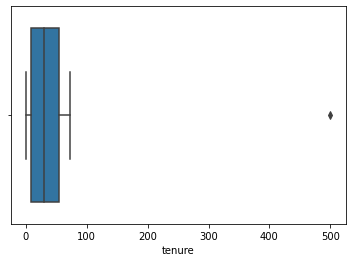

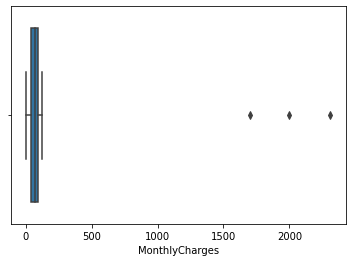

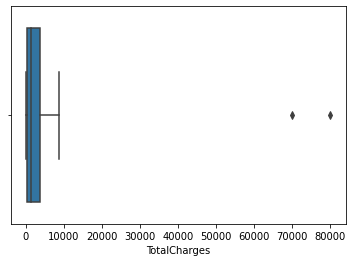

In [32]:
plt.figure()
sns.boxplot(x=df['tenure'])
plt.show()

plt.figure()
sns.boxplot(x=df['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x=df['TotalCharges'])
plt.show()

Mengatasi Outlier

In [34]:
Q1 = (df[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

In [36]:
IQR = Q3-Q1
maximum = Q3+(1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah:')
print(maximum)
minimum = Q1-(1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah:')
print(minimum)

Nilai Maximum dari masing-masing Variable adalah:
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai Minimum dari masing-masing Variable adalah:
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64


In [37]:
#Ubah Nilai yg di luar Range Minumum & Maximum ke dalam nilai Minimum dan Maximum
more_than = (df>maximum)
lower_than = (df<minimum)
df = df.mask(more_than,maximum,axis=1)
df = df.mask(lower_than, minimum, axis=1)

In [38]:
print('Persebaran data setelah ditangani Outlier:')
print(df[['tenure','MonthlyCharges','TotalCharges']].describe())

Persebaran data setelah ditangani Outlier:
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


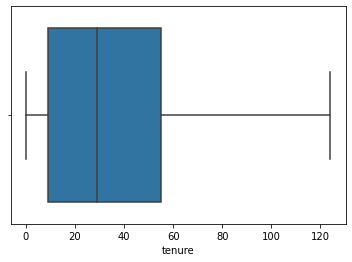

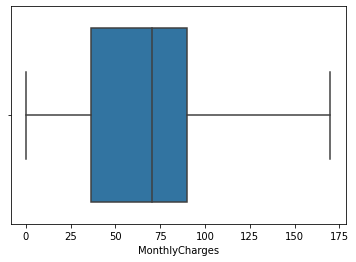

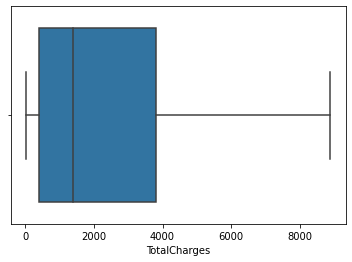

In [41]:
plt.figure()
sns.boxplot(x=df['tenure'])
plt.show()

plt.figure()
sns.boxplot(x=df['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x=df['TotalCharges'])
plt.show()

Mendeteksi Nilai yang tidak Standar

In [45]:
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
    print(df[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Befor

Menstandarisasi Variable Kategorik

In [46]:
df = df.replace(['Wanita','Laki-laki','Iya','Churn'],['Female','Male','Yes','Yes'])

for col_name in list(['gender', 'Dependents', 'Churn']):
 # write your command here
	print('\nUnique Value Count \033[1m'+'After Standardized\033[0m Variable',col_name)
	print(df[col_name].value_counts())


Unique Value Count After Standardized Variable gender
Male         3499
Female       3445
Laki-Laki       6
Name: gender, dtype: int64

Unique Value Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Value Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64
